# ***let's perform simple linear Regression***

In [2]:
import pandas as pd
advertising = pd.read_csv('/content/ironmarketing.csv')

In [3]:
# Display the first 5 rows
advertising.head()

Iron  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9

In [4]:
 #Display the last 5 rows
advertising.tail()

Iron  Sales
194  165.11  12.11
195  165.12  12.12
196  165.13  12.13
197  165.14  12.14
198  165.15  12.15

In [5]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Iron    199 non-null    float64
 1   Sales   199 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(199, 2)

In [7]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

Iron       Sales
count  199.000000  199.000000
mean   148.319849   14.010804
std     83.527086    5.030057
min      0.700000    1.600000
25%     75.400000   10.600000
50%    165.100000   12.800000
75%    217.250000   17.300000
max    296.400000   27.000000

<Axes: xlabel='Iron', ylabel='Sales'>

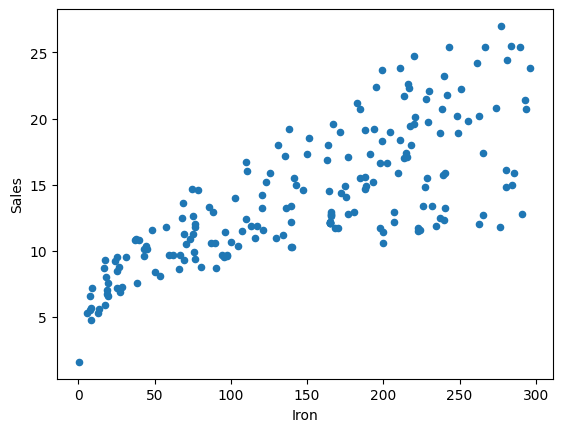

In [10]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='Iron',y='Sales',kind='scatter')

# **Perfroming Simple Linear Regression**

Equation of linear regression y=c+m1x1+m2x2+...+mnxn

y is the response  | c is the intercept

m1 is the coefficient for the first feature

mn is the coefficient for the nth feature

In our case:

y=c+m1×TV
The m values are called the model coefficients or model parameters.

Generic Steps in Model Building using sklearn Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library.

# **Preparing X and y**

The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.

However, X can be a dataframe as Pandas is built over NumPy

In [12]:
# Putting feature variable to X
X = advertising['Iron']



# Print the first 5 rows
X.head()



0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: Iron, dtype: float64

In [13]:
# Putting response variable to y
y = advertising['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting Data into Training and Testing Sets

In [14]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [15]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
train_test_split
# read the documentation

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(139,)
(139,)
(60,)
(60,)


In [19]:
import numpy as np

# Convert X_train and X_test to numpy arrays first
X_train = np.array(X_train)[:, np.newaxis]
X_test = np.array(X_test)[:, np.newaxis]

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(139, 1)
(139,)
(60, 1)
(60,)


# Performing Linear Regression

In [21]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

# Coefficients Calculation

In [22]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.693047701814848
[0.05026717]


# y=6.989+0.0464×Iron

Now, let's use this equation to predict our sales.

# Predictions

In [24]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)
type(y_pred)

numpy.ndarray

# Computing RMSE and R^2 Values

RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset.

# This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

In [25]:
y_test.shape # cheek the shape to generate the index for plot

(60,)

Text(0, 0.5, 'Sales')

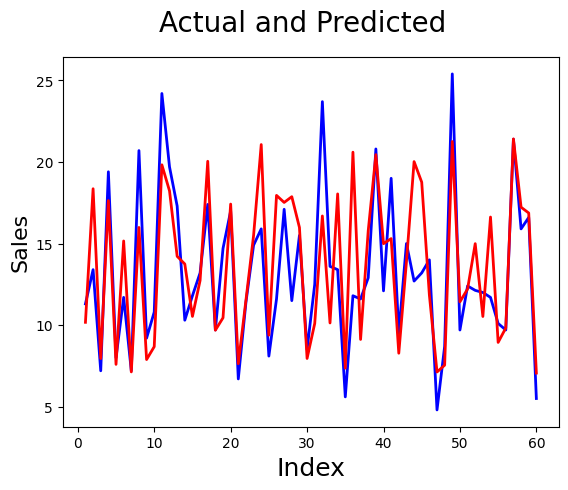

In [26]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

`both plots are same `

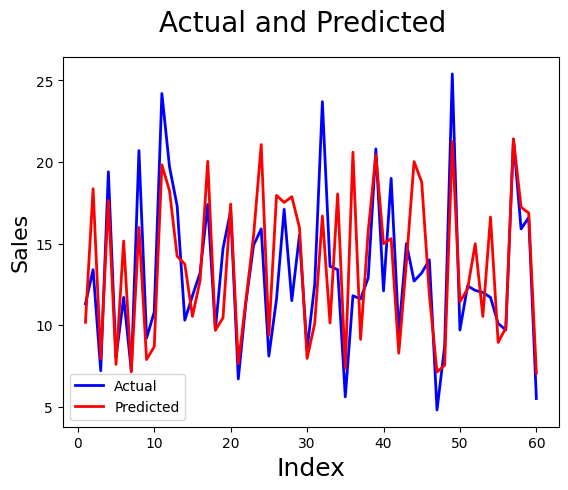

In [27]:
import matplotlib.pyplot as plt

# Generating index
c = [i for i in range(1, 61, 1)]

# Creating the plot
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-", label='Actual')
plt.plot(c, y_pred, color="red", linewidth=2, linestyle="-", label='Predicted')

# Adding title and labels
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


Text(0, 0.5, 'ytest-ypred')

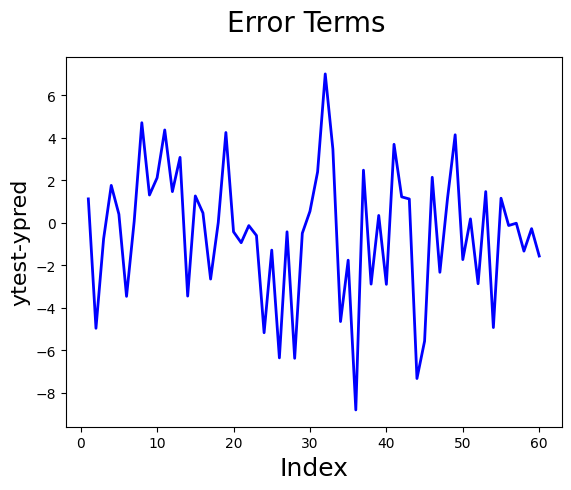

In [28]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [30]:
r_squared = r2_score(y_test, y_pred)

In [31]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 10.264695924439057
r_square_value : 0.5249524616297394



# Mean_Squared_Error : 10.264695924439057

This MSE value indicates that the model has some error in its predictions.
A lower MSE would indicate a better fit.

# r2 means that your model is 52% is accurate on test data .

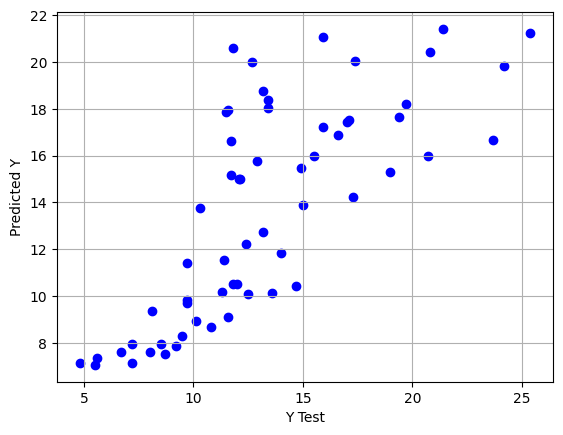

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

![congrate GIF](https://media.giphy.com/media/9PtGpVj632v3NUye46/giphy.gif?cid=790b7611r5k9nc92qhu0pd8yq7ghdxyatv64m8vfdui9id9b&ep=v1_gifs_search&rid=giphy.gif&ct=g)
**You did it! 🎉**